# Análisis de telemetría en la F1
#### Autor: Jorge Calvo

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import fastf1.plotting
import numpy as np
import seaborn as sns
from matplotlib import colormaps
from matplotlib.collections import LineCollection
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

## Carreras Gran Premios F1 2023

In [3]:
schedule = fastf1.get_event_schedule(2023)
schedule

req         WARNING 	DEFAULT CACHE ENABLED! (823.31 MB) C:\Users\JorgeCalvoMartín-CEM\AppData\Local\Temp\fastf1


,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00+03:00,2023-02-23 07:00:00,...,Practice 3,2023-02-25 10:00:00+03:00,2023-02-25 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00+03:00,2023-03-03 11:30:00,...,Practice 3,2023-03-04 14:30:00+03:00,2023-03-04 11:30:00,Qualifying,2023-03-04 18:00:00+03:00,2023-03-04 15:00:00,Race,2023-03-05 18:00:00+03:00,2023-03-05 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00+03:00,2023-03-17 13:30:00,...,Practice 3,2023-03-18 16:30:00+03:00,2023-03-18 13:30:00,Qualifying,2023-03-18 20:00:00+03:00,2023-03-18 17:00:00,Race,2023-03-19 20:00:00+03:00,2023-03-19 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00+10:00,2023-03-31 02:30:00,...,Practice 3,2023-04-01 12:30:00+10:00,2023-04-01 02:30:00,Qualifying,2023-04-01 16:00:00+10:00,2023-04-01 06:00:00,Race,2023-04-02 15:00:00+10:00,2023-04-02 05:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00+04:00,2023-04-28 09:30:00,...,Sprint Shootout,2023-04-29 12:30:00+04:00,2023-04-29 08:30:00,Sprint,2023-04-29 17:30:00+04:00,2023-04-29 13:30:00,Race,2023-04-30 15:00:00+04:00,2023-04-30 11:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00-04:00,2023-05-05 18:00:00,...,Practice 3,2023-05-06 12:30:00-04:00,2023-05-06 16:30:00,Qualifying,2023-05-06 16:00:00-04:00,2023-05-06 20:00:00,Race,2023-05-07 15:30:00-04:00,2023-05-07 19:30:00,True
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00+02:00,2023-05-26 11:30:00,...,Practice 3,2023-05-27 12:30:00+02:00,2023-05-27 10:30:00,Qualifying,2023-05-27 16:00:00+02:00,2023-05-27 14:00:00,Race,2023-05-28 15:00:00+02:00,2023-05-28 13:00:00,True
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00+02:00,2023-06-02 11:30:00,...,Practice 3,2023-06-03 12:30:00+02:00,2023-06-03 10:30:00,Qualifying,2023-06-03 16:00:00+02:00,2023-06-03 14:00:00,Race,2023-06-04 15:00:00+02:00,2023-06-04 13:00:00,True
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00-04:00,2023-06-16 17:30:00,...,Practice 3,2023-06-17 12:30:00-04:00,2023-06-17 16:30:00,Qualifying,2023-06-17 16:00:00-04:00,2023-06-17 20:00:00,Race,2023-06-18 14:00:00-04:00,2023-06-18 18:00:00,True
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 13:30:00+02:00,2023-06-30 11:30:00,...,Sprint Shootout,2023-07-01 12:00:00+02:00,2023-07-01 10:00:00,Sprint,2023-07-01 16:30:00+02:00,2023-07-01 14:30:00,Race,2023-07-02 15:00:00+02:00,2023-07-02 13:00:00,True


### Cargamos el circuito a estudiar

In [4]:
session = fastf1.get_session(2023, 15, 'R')
session.load(telemetry=True, weather=False)
session.results

core           INFO 	Loading data for Singapore Grand Prix - Race [v3.3.7]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 18
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 18)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '4', '44', '16', '1', '10', '81', '11', '40', '20', '23', '24', '27', '2', '1

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,1.0,1,1.0,NaT,NaT,NaT,0 days 01:46:37.418000,Finished,25.0
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,2.0,2,4.0,NaT,NaT,NaT,0 days 00:00:00.812000,Finished,18.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,3.0,3,5.0,NaT,NaT,NaT,0 days 00:00:01.269000,Finished,16.0
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:21.177000,Finished,12.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,5.0,5,11.0,NaT,NaT,NaT,0 days 00:00:21.441000,Finished,10.0
10,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,6.0,6,12.0,NaT,NaT,NaT,0 days 00:00:38.441000,Finished,8.0
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,7.0,7,17.0,NaT,NaT,NaT,0 days 00:00:41.479000,Finished,6.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,8.0,8,13.0,NaT,NaT,NaT,0 days 00:00:59.534000,Finished,4.0
40,40,L LAWSON,LAW,lawson,AlphaTauri,5E8FAA,alphatauri,Liam,Lawson,Liam Lawson,...,NZL,9.0,9,10.0,NaT,NaT,NaT,0 days 00:01:05.918000,Finished,2.0
20,20,K MAGNUSSEN,MAG,kevin_magnussen,Haas F1 Team,B6BABD,haas,Kevin,Magnussen,Kevin Magnussen,...,DEN,10.0,10,6.0,NaT,NaT,NaT,0 days 00:01:12.116000,Finished,1.0


### Graficar resultado de la carrera

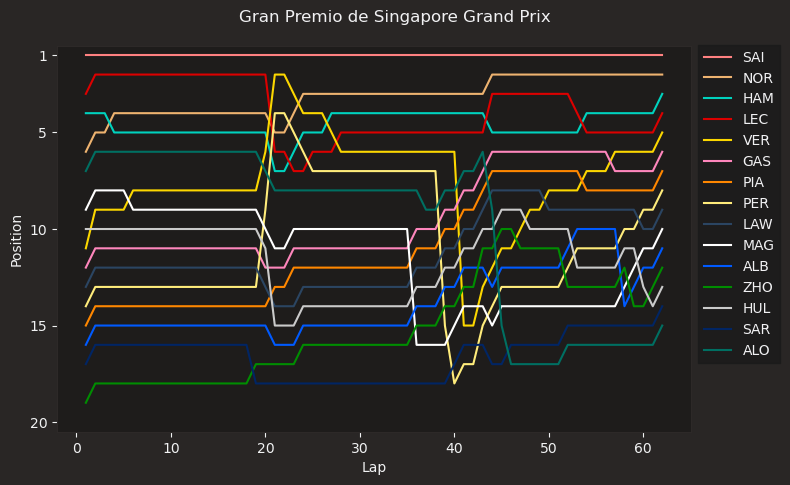

In [6]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))
fig.suptitle("Gran Premio de " + session.event["EventName"])

for drv in session.drivers[:15]:
    drv_laps = session.laps.pick_driver(drv)
    abb = drv_laps['Driver'].iloc[0]

    color = fastf1.plotting.driver_color(abb)


    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.savefig("graphs/"+session.event["EventName"]+"result.png")
plt.show()

### Cargamos la telemetría del circuito

In [17]:
lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

#### Trazar qué marcha se utiliza en cada punto del circuito

In [18]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
gear = tel['nGear'].to_numpy().astype(float)

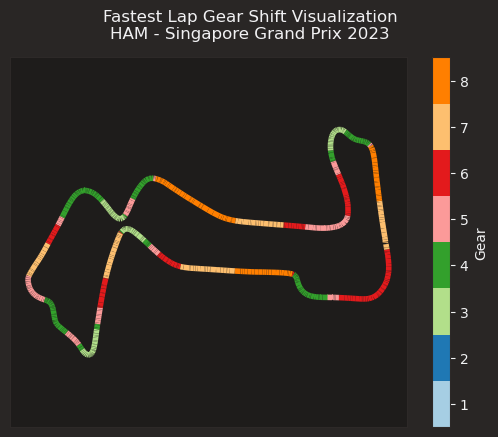

In [19]:
cmap = colormaps['Paired']
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)
cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))

plt.savefig("graphs/"+session.event["EventName"]+"Gearcircuit.png")
plt.show()

### Velocidad de carrera en el circuito

In [10]:
lap = session.laps.pick_driver("VER").pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [11]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

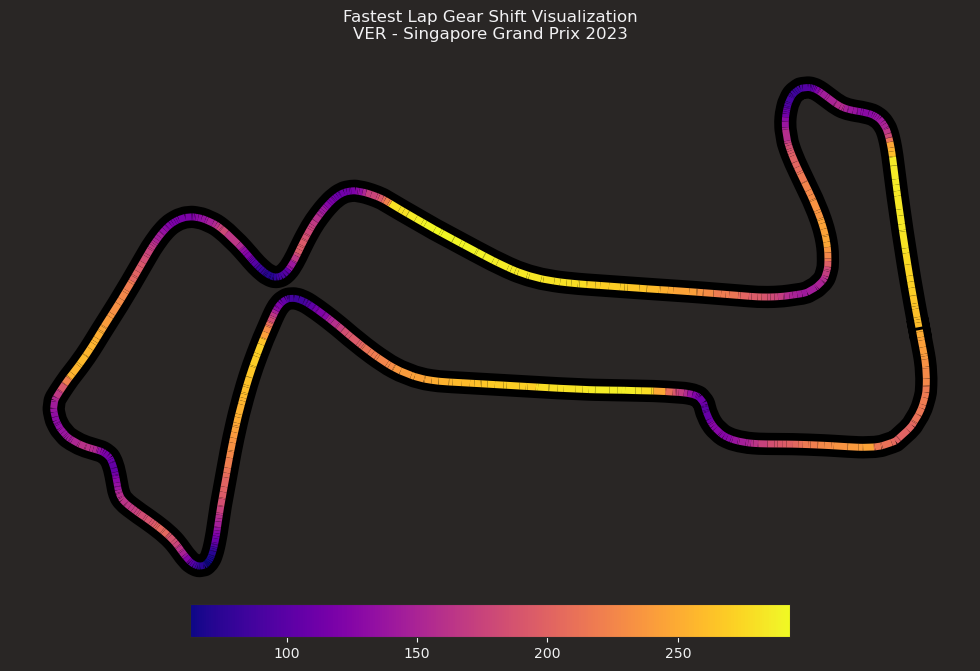

In [12]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'],
        color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=mpl.cm.plasma, norm=norm,
                    linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.cm.plasma,
                                   orientation="horizontal")


# Show the plot
plt.savefig("graphs/"+session.event["EventName"]+"speedCircuit.png")
plt.show()

### Trazados de velocidad con anotaciones en las esquinas
#### Piloto ganador de la carrera

In [13]:
fastest_lap = session.laps.pick_fastest()
car_data = fastest_lap.get_car_data().add_distance()

In [14]:
circuit_info = session.get_circuit_info()

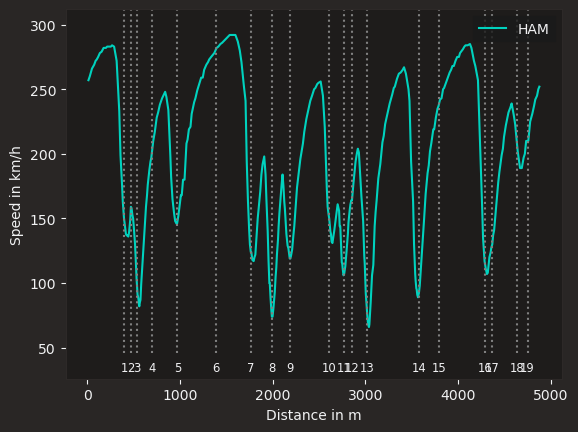

In [15]:
team_color = fastf1.plotting.team_color(fastest_lap['Team'])

fig, ax = plt.subplots()
ax.plot(car_data['Distance'], car_data['Speed'],
        color=team_color, label=fastest_lap['Driver'])

# Draw vertical dotted lines at each corner that range from slightly below the
# minimum speed to slightly above the maximum speed.
v_min = car_data['Speed'].min()
v_max = car_data['Speed'].max()
ax.vlines(x=circuit_info.corners['Distance'], ymin=v_min-20, ymax=v_max+20,
          linestyles='dotted', colors='grey')

# Plot the corner number just below each vertical line.
# For corners that are very close together, the text may overlap. A more
# complicated approach would be necessary to reliably prevent this.
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    ax.text(corner['Distance'], v_min-30, txt,
            va='center_baseline', ha='center', size='small')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')
ax.legend()

# Manually adjust the y-axis limits to include the corner numbers, because
# Matplotlib does not automatically account for text that was manually added.
ax.set_ylim([v_min - 40, v_max + 20])

plt.savefig("graphs/"+session.event["EventName"]+"individual.png")
plt.show()

### Comparativa de pilotos

In [36]:
drive1_lap = session.laps.pick_driver('SAI').pick_fastest()
drive2_lap = session.laps.pick_driver('VER').pick_fastest()

In [37]:
drive1_tel = drive1_lap.get_car_data().add_distance()
drive2_tel = drive2_lap.get_car_data().add_distance()

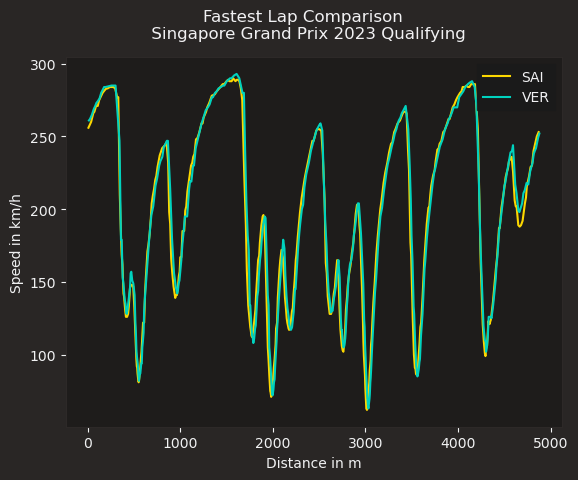

In [39]:
rbr_color = fastf1.plotting.team_color('RBR')
mer_color = fastf1.plotting.team_color('MER')

fig, ax = plt.subplots()
ax.plot(drive1_tel['Distance'], drive1_tel['Speed'], color=rbr_color, label='SAI')
ax.plot(drive2_tel['Distance'], drive2_tel['Speed'], color=mer_color, label='VER')

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.savefig("graphs/"+session.event["EventName"]+"comparative.png")
plt.show()

## Driver Laptimes Scatterplot

In [15]:
driver_laps = session.laps.pick_driver("LEC").pick_quicklaps().reset_index()

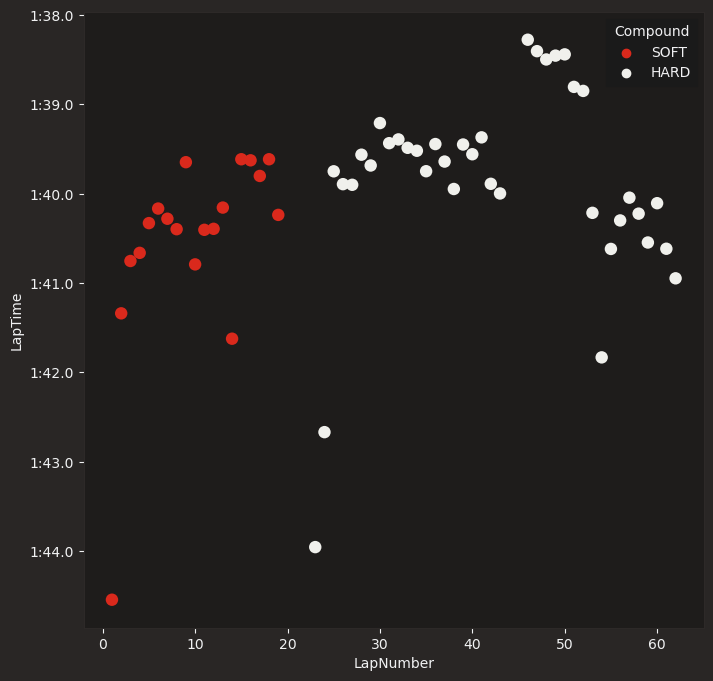

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')
plt.savefig("graphs/"+session.event["EventName"]+"Gearcircuit.png")